In [137]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [138]:
def drawGraph(centroids, clusters, nrOfCentroids):
    """Alogirthm visualization"""
    colors = ['b', 'r', 'c', 'm', 'y'] 
    for i in range(nrOfCentroids):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % len(colors)])
        plt.scatter(centroids[i][0], centroids[i][1], c='g', s=100)

In [139]:
def calculateCost(centroids, clusters, totalPoints):
    totalSum = 0.0
    for cluster in clusters:
        totalSum += ((np.linalg.norm(clusters[cluster] - centroids[cluster])) ** 2)
    return totalSum / totalPoints

In [140]:
def createClusters(data, centroids, nrOfCentroids):
    """Cluster assignment step, we take our points and calculate distance between centroids and then return cluster groups closest to given centroid""" 
    clusters = {}
    for i in range(nrOfCentroids):
        clusters[i] = []
    for d in data:
        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(d - centroid))
        nrOfCluster = distances.index(min(distances))
        clusters[nrOfCluster].append(d)
    return clusters

In [141]:
def createCentroids(data):
    """Create centroids step"""
    centStart = np.random.randint(len(data) - nrOfCentroids - 1)
    centEnd = centStart + nrOfCentroids
    return data[centStart:centEnd]


In [142]:
def moveCentroids(centroids, clusters):
    """Move centroids step, it calculates mean of """
    for cluster in clusters:
        averaged = np.mean(clusters[cluster], axis=0)
        centroids[cluster] = averaged
    return centroids


In [143]:
def kmeans(data, nrOfCentroids=3, limit1=100, limit2=50):
    """K-means algorithm"""
    cost = np.inf
    for i in range(limit1):
        centroidsTemp = createCentroids(data)
        for x in range(limit2):
            clustersTemp = createClusters(data, centroidsTemp, nrOfCentroids)
            centroidsTemp = moveCentroids(centroidsTemp, clustersTemp)

        costTemp = calculateCost(centroidsTemp, clustersTemp, len(data))
        if costTemp < cost:
            cost = costTemp
            centroids = centroidsTemp
            clusters = clustersTemp
    drawGraph(centroidsTemp, clustersTemp,nrOfCentroids)
    return centroids, clusters, cost

cost:  0.18464871208691438


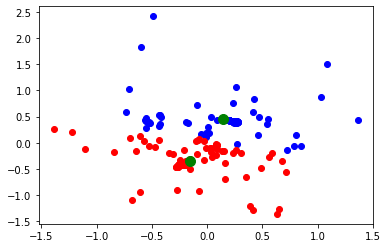

In [144]:
nrOfCentroids=2
points = np.vstack(((np.random.randn(150, 2) * 0.75 ),
                  (np.random.randn(50, 2) * 0.25 ),
                  (np.random.randn(50, 2) * 0.5 )))
km = kmeans(points, nrOfCentroids, 150, 60)
print('cost: ', km[2])

cost:  0.10829162869512898


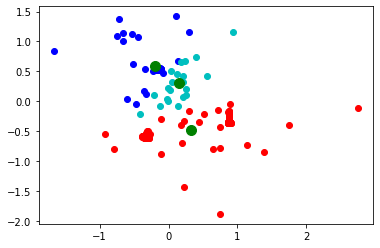

In [145]:
nrOfCentroids=3
points = np.vstack(((np.random.randn(150, 2) * 0.75 ),
                  (np.random.randn(50, 2) * 0.25 ),
                  (np.random.randn(50, 2) * 0.5 )))
km = kmeans(points, nrOfCentroids, 150, 60)
print('cost: ', km[2])